In [122]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from math import e
from joblib import dump, load
import xskillscore as xs
import cartopy.crs as ccrs
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.cm as mpl_cm
from eofs.xarray import Eof
import cartopy.crs as ccrs
import matplotlib.ticker as ticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import datetime

In [8]:
fogData = xr.open_dataset('../../Data/FogData/CombinedFogData_25Stations.nc')

In [119]:
StackFog=fogData.fogdata.stack(a=('years','months','days'))
StackFog
dd =[];
for i in range(StackFog.years.values.shape[0]):
    dd=dd+[str(StackFog.years[i].values)+'-'+str(StackFog.months[i].values)+"-"+str(StackFog.days[i].values)]
fg = xr.Dataset({'fogdata': (('time','stations'), StackFog.values.T)}, coords={'time': pd.to_datetime(dd),'stations': fogData.stations})
yAll=fg.fogdata.sum(dim='stations').sel(time=slice('1980-12-1','2018-1-31'))
#yAll=yAll/25.0
#yWd= yAll[yAll >0.44]
#yWd
#yAll

In [127]:
sFog=np.zeros(38)
i=0
for y in np.arange(1981,2019):
    dStart=datetime.datetime(y-1, 12, 1)
    #print(dStart)
    dEnd=datetime.datetime(y, 1, 31)
    fgstudySt=yAll.sel(time=slice(dStart,dEnd))
    #rint(fgstudySt)
    StCnt=fgstudySt.sum(dim='time')
    #rint(StCnt.values)
    sFog[i]=StCnt.values
    #print(i) 
    i=i+1

sFog

array([245., 188., 306., 188., 202., 264., 323., 374., 191., 390., 235.,
       361., 313., 315., 410., 417., 465., 545., 637., 528., 494., 672.,
       735., 825., 529., 399., 485., 372., 613., 533., 432., 693., 619.,
       631., 739., 617., 803., 678.])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

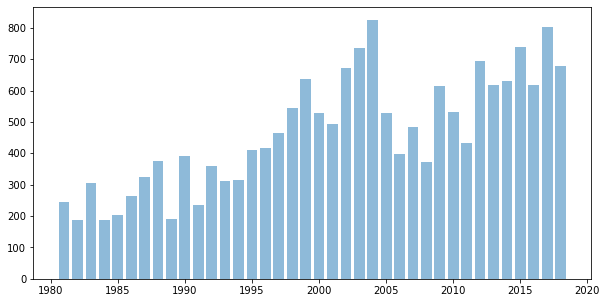

In [133]:
years=np.arange(1981,2019)
fig,ax = plt.subplots(figsize=[10,5])
#ax.plot(years, sFog, color="red", marker="o")
ax.bar(years, sFog, align='center', alpha=0.5)
plt.savefig('Temporal_Fog_1980Dec1981Jan-2017Dec207Jan.eps')
plt.show()

In [40]:
fgstudy=fg.sel(time=slice('1980-12-1','2018-1-31'))
fgstudy
dayCnt=fgstudy.time.shape[0]
print(dayCnt)

2356


In [84]:
sNums=[42071,42103,42101,42131,42137,42176,42182,42181,42148,42266,42271,42270,42369,42471,42273,42475,42479,
      42379,42483,42482,42589,42484,42591,42492,42387]
sNums.reverse()
sNames=['Amritsar','Ambala','Patiala','Hissar','Karnal','Rohtak','New Delhi (Safdarjung)',
       'New Delhi (Palam)', 'Pantnagar','Shahjahanpur','Hardoi','Kheri','Lucknow','Fatehpur',
       'Baharaich','Allahabad','Varanasi','Gorakhpur','BHU Campus','Gazipur',
       'Churk','Ballia','Gaya','Patna','Muzaffarpur']
sNames.reverse()

In [85]:
tFDays=np.zeros(25)
print(tFDays)
print(len(sNums))
i=0
for n in sNums :
    fgstudySt=fgstudy.sel(stations=n)
    StCnt=fgstudySt.fogdata.sum(dim='time')
    print(StCnt.values)
    tFDays[i]=StCnt.values
    i=i+1

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
25
663.0
916.0
473.0
221.0
325.0
600.0
865.0
806.0
1424.0
717.0
708.0
306.0
1176.0
605.0
526.0
350.0
733.0
1296.0
1324.0
534.0
334.0
515.0
744.0
700.0
905.0


In [117]:
tFDays[0]

663.0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

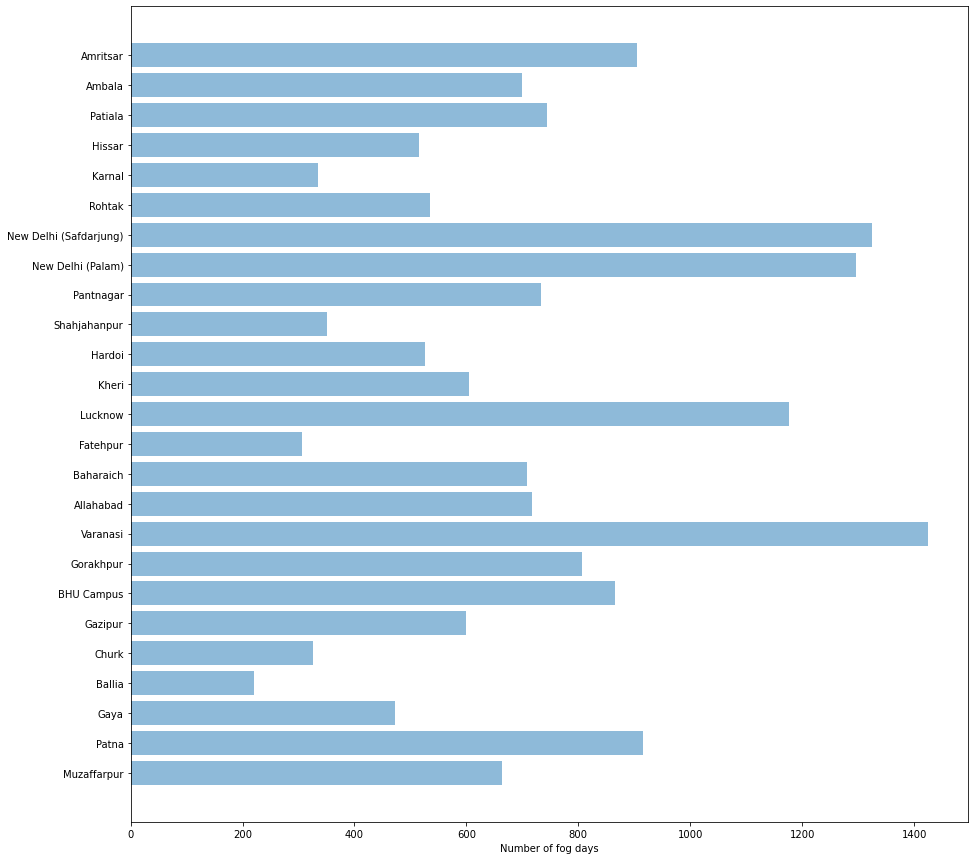

In [118]:
fig,ax = plt.subplots(figsize=(15,15))
y_pos = np.arange(len(sNames))
plt.barh(y_pos, tFDays, align='center', alpha=0.5)
plt.yticks(y_pos, sNames)
plt.xlabel('Number of fog days')
#plt.title('Programming language usage')
plt.savefig('Spatial_Fog_1980Dec1981Jan-2017Dec207Jan.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

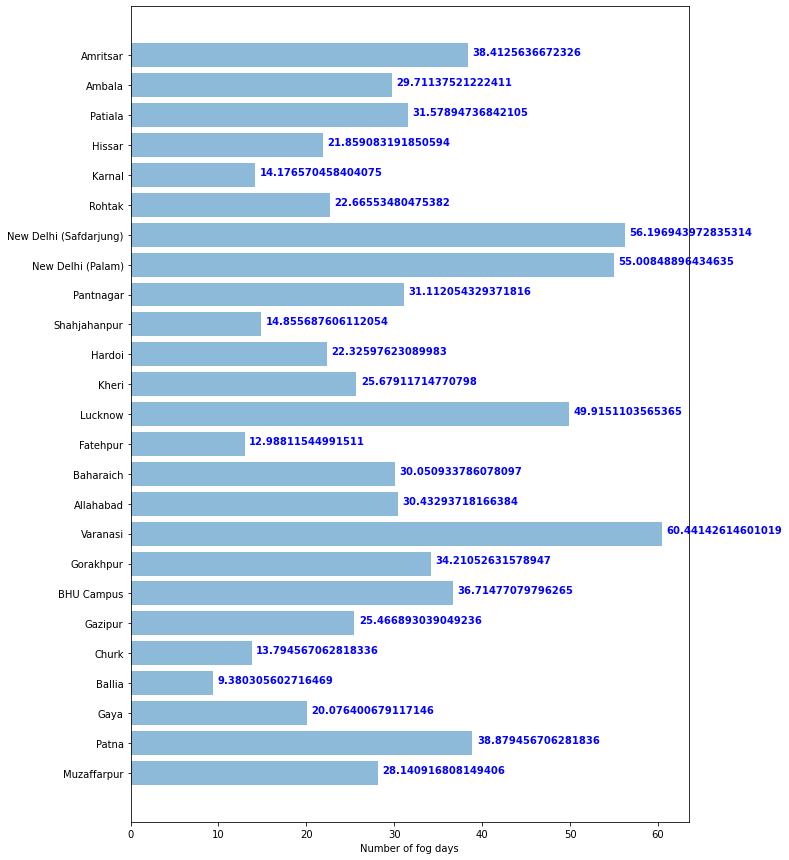

In [114]:
fig,ax = plt.subplots(figsize=(10,15))
y_pos = np.arange(len(sNames))
ax.barh(y_pos, tFDays*100.0/dayCnt, align='center', alpha=0.5)
ax.set_yticks(y_pos)
ax.set_yticklabels(sNames, minor=False)
ax.set_xlabel('Number of fog days')
#plt.title('Programming language usage')

for i,v in zip(y_pos,tFDays):
    #print(i)
    #print(v)
    ax.text(v*100.0/dayCnt + 0.5, i , v*100.0/dayCnt, color='blue', fontweight='bold')
plt.savefig('Spatial_Fog_1980Dec1981Jan-2017Dec207Jan_percent.eps')
plt.show()

In [36]:
fgstudyAmritsar=fgstudy.sel(stations=42071)
fgstudyAmritsar
fgstudyAmritsar
AmritsarCnt=fgstudyAmritsar.fogdata.sum(dim='time')
print(AmritsarCnt)
print(AmritsarCnt/dayCnt)

<xarray.DataArray 'fogdata' ()>
array(704.)
Coordinates:
    stations  int32 42071
<xarray.DataArray 'fogdata' ()>
array(0.33396584)
Coordinates:
    stations  int32 42071


In [37]:
fgstudyAmritsar=fgstudy.sel(stations=42479)
fgstudyAmritsar
fgstudyAmritsar
AmritsarCnt=fgstudyAmritsar.fogdata.sum(dim='time')
print(AmritsarCnt)
print(AmritsarCnt/dayCnt)

<xarray.DataArray 'fogdata' ()>
array(1190.)
Coordinates:
    stations  int32 42479
<xarray.DataArray 'fogdata' ()>
array(0.56451613)
Coordinates:
    stations  int32 42479


In [38]:
fgstudyAmritsar=fgstudy.sel(stations=42181)
fgstudyAmritsar
fgstudyAmritsar
AmritsarCnt=fgstudyAmritsar.fogdata.sum(dim='time')
print(AmritsarCnt)
print(AmritsarCnt/dayCnt)

<xarray.DataArray 'fogdata' ()>
array(1108.)
Coordinates:
    stations  int32 42181
<xarray.DataArray 'fogdata' ()>
array(0.5256167)
Coordinates:
    stations  int32 42181


In [39]:
fgstudyAmritsar=fgstudy.sel(stations=42369)
fgstudyAmritsar
fgstudyAmritsar
AmritsarCnt=fgstudyAmritsar.fogdata.sum(dim='time')
print(AmritsarCnt)
print(AmritsarCnt/dayCnt)

<xarray.DataArray 'fogdata' ()>
array(944.)
Coordinates:
    stations  int32 42369
<xarray.DataArray 'fogdata' ()>
array(0.44781784)
Coordinates:
    stations  int32 42369
